<a href="https://colab.research.google.com/github/A01662420/SemanaTec6_4toSemesrte/blob/main/SMART_A01662420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Actividad Evaluable 3:  Mapas de calor y boxplots
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/covid19_tweets.csv')

"""Diagrama de cajas y bigotes"""
sns.boxplot(data=df, orient="h")

"""Histogramas"""
df.hist(figsize=(20,15))
plt.show()

"""Mapas de calor"""
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)
plt.show()


"""
1. ¿Hay alguna variable que no aporta información?


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/covid19_tweets.csv')

relevant_cols = ['user_name', 'user_followers', 'user_verified', 'text']
data = data[relevant_cols]

In [ ]:
# Selección de los tweets que contienen información errónea o engañosa relacionada con COVID-19
misleading_tweets = data[data['text'].str.contains('misinformation|misleading|false|fake|hoax', case=False)]

In [ ]:
# Selección de los 100 usuarios con mayor número de seguidores que publican información errónea o engañosa relacionada con COVID-19
top_misleading_users = misleading_tweets.groupby('user_name')['user_followers'].max().sort_values(ascending=False).head(100)

/usr/local/lib/python3.9/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


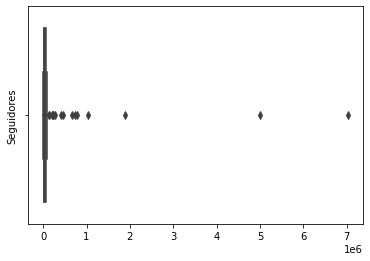

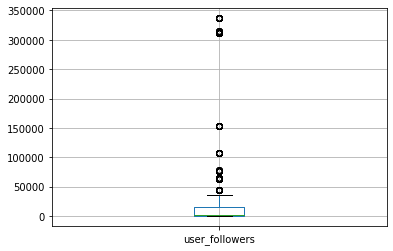

In [ ]:
# cajas y bigotes
sns.boxplot(x=top_misleading_users.values, orient='v')
plt.ylabel('Seguidores')
plt.show()

# Selecciona los 100 usuarios más influyentes que publican información errónea o engañosa relacionada con COVID-19
top_users = data[data["user_verified"] == False].groupby("user_name").size().nlargest(100)
followers_data = data[data["user_name"].isin(top_users.index)][["user_name", "user_followers"]]
followers_data.boxplot(column=["user_followers"])
plt.show()


<Axes: xlabel='user_name', ylabel='user_followers'>

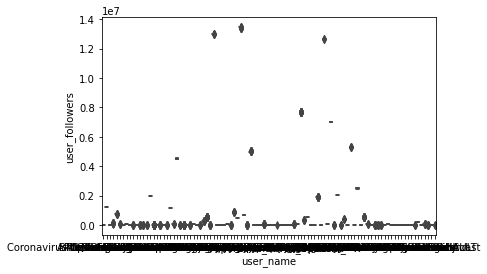

In [6]:
import pandas as pd
import seaborn as sns

# Cargar el dataset
covid19_tweets = pd.read_csv("/content/sample_data/covid19_tweets.csv")
# Seleccionar los 100 usuarios más influyentes
influencers = covid19_tweets.groupby("user_name").size().sort_values(ascending=False)[:100].index.tolist()

# Filtrar los tweets de los usuarios influyentes
influencer_tweets = covid19_tweets[covid19_tweets["user_name"].isin(influencers)]
sns.boxplot(x="user_name", y="user_followers", data=influencer_tweets)


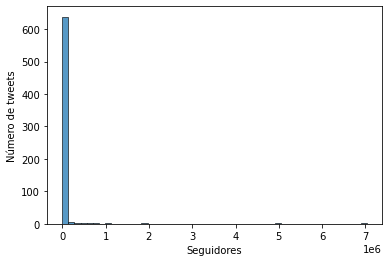

In [ ]:
# Histograma  *distribución de los tweets que contienen información errónea o engañosa relacionada con COVID-19*
sns.histplot(data=misleading_tweets, x='user_followers', kde=False, bins=50)
plt.xlabel('Seguidores')
plt.ylabel('Número de tweets')
plt.show()

In [ ]:
# Dataframe con las conexiones entre usuarios que publican información errónea
user_connections = misleading_tweets.groupby(['user_name', 'user_verified'])['text'].count().reset_index()
user_connections = user_connections.pivot(index='user_name', columns='user_verified', values='text').fillna(0)

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) mis

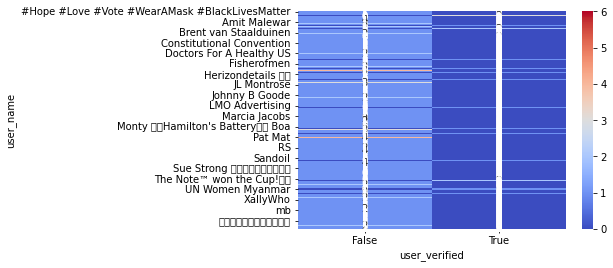

In [ ]:
# Mapa de calor para visualizar las conexiones entre usuarios
sns.heatmap(user_connections, cmap='coolwarm', annot=True, fmt='.0f')
plt.show()